### importing libraries

In [10]:
import re
from collections import defaultdict
import networkx as nx
from matplotlib.pyplot import figure
import time
import tensorflow as tf
import time
import nltk
import networkx as nx
# ! pip install nltk
import nltk
nltk.download('all')
import matplotlib.pyplot as plt
from nltk.corpus import state_union
from nltk.tokenize import PunktSentenceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import wordnet
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import seaborn as sns
import numpy as np

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to C:\Users\Mohamed
[nltk_data]    |     Mousa\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to C:\Users\Mohamed
[nltk_data]    |     Mousa\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Mohamed
[nltk_data]    |     Mousa\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Mohamed
[nltk_data]    |     Mousa\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_da

In [11]:
### load_data
train_text = state_union.raw("2005-GWBush.txt")
sample_text = state_union.raw("2006-GWBush.txt")

In [12]:
### sample of data
sample_text[:200]

"PRESIDENT GEORGE W. BUSH'S ADDRESS BEFORE A JOINT SESSION OF THE CONGRESS ON THE STATE OF THE UNION\n \nJanuary 31, 2006\n\nTHE PRESIDENT: Thank you all. Mr. Speaker, Vice President Cheney, members of Con"

In [13]:
### sample of data
train_text[:500]

"PRESIDENT GEORGE W. BUSH'S ADDRESS BEFORE A JOINT SESSION OF THE CONGRESS ON THE STATE OF THE UNION\n \nFebruary 2, 2005\n\n\n9:10 P.M. EST \n\nTHE PRESIDENT: Mr. Speaker, Vice President Cheney, members of Congress, fellow citizens: \n\nAs a new Congress gathers, all of us in the elected branches of government share a great privilege: We've been placed in office by the votes of the people we serve. And tonight that is a privilege we share with newly-elected leaders of Afghanistan, the Palestinian Territo"

### text preprocessing

In [14]:
stemmer = WordNetLemmatizer()

def clean_txt(x):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(x))
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    # Converting to Lowercase
    document = document.lower()
    # word tokenize
    document = word_tokenize(document)
    # remove stop words
    document = [word for word in document if word not in stopwords.words('english')]
    # word lemmatization
    document = [stemmer.lemmatize(word) for word in document]
#     document = ' '.join(document)

    return document

In [15]:
#cleaned_sample = clean_txt(sample_text)
cleaned_train = clean_txt(train_text)[200:400]

### pos

In [17]:
### pos 
tagged = nltk.pos_tag(cleaned_train)

In [18]:
tagged[:40]

[('delivered', 'VBN'),
 ('nation', 'NN'),
 ('grateful', 'NN'),
 ('must', 'MD'),
 ('add', 'VB'),
 ('achievement', 'JJ'),
 ('making', 'VBG'),
 ('economy', 'NN'),
 ('flexible', 'JJ'),
 ('innovative', 'JJ'),
 ('competitive', 'JJ'),
 ('keep', 'NN'),
 ('america', 'IN'),
 ('economic', 'JJ'),
 ('leader', 'NN'),
 ('world', 'NN'),
 ('applause', 'NN'),
 ('america', 'NN'),
 ('prosperity', 'NN'),
 ('requires', 'VBZ'),
 ('restraining', 'VBG'),
 ('spending', 'VBG'),
 ('appetite', 'JJ'),
 ('federal', 'JJ'),
 ('government', 'NN'),
 ('welcome', 'VBD'),
 ('bipartisan', 'JJ'),
 ('enthusiasm', 'NN'),
 ('spending', 'NN'),
 ('discipline', 'NN'),
 ('send', 'VBP'),
 ('budget', 'NN'),
 ('hold', 'NN'),
 ('growth', 'NN'),
 ('discretionary', 'JJ'),
 ('spending', 'NN'),
 ('inflation', 'NN'),
 ('make', 'VBP'),
 ('tax', 'NN'),
 ('relief', 'NN')]

### building graph

Using zip to create the appropriate pairings between consecutive words in the sentence makes this simple. I also use add_edge instead since this automatically adds the nodes as well. Note the third parameter of add_edge allows you to take in a key parameter that can be used to identify that unique edge in a nx.MultiGraph object. I am not sure what exactly is the format of your .csv file, so I am just passing in a sentence as a list containing tuples of (word, POS) for the following example. Hope this helps!

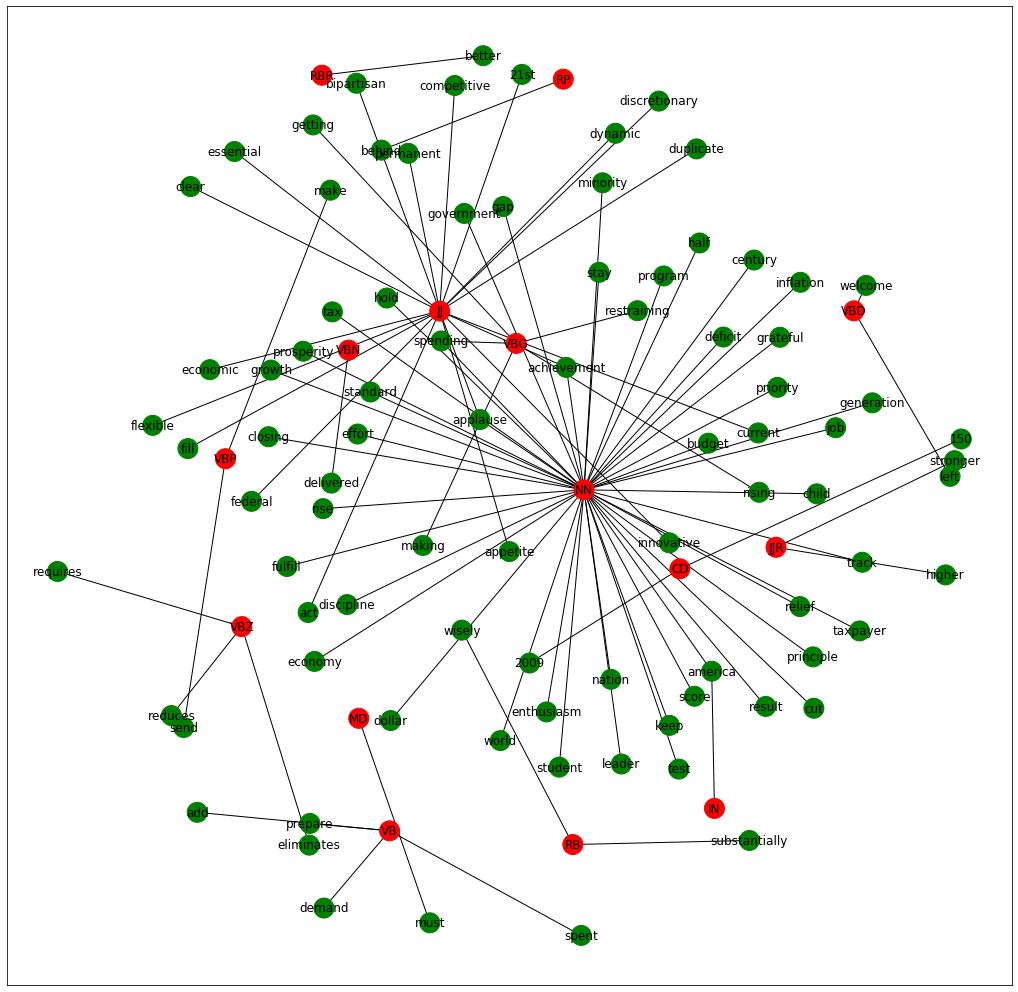

Time Taken to Draw the graph :  0.4249110221862793


In [28]:
start_time = time.time()
# Create a network graph to visualize the POS tags
G = nx.Graph()

# Add nodes for each word and POS tag
for word, pos_tag in tagged[:100]:
    G.add_node(word)
    G.add_node(pos_tag)
    G.add_edge(word, pos_tag)

# Set node colors based on POS tag
node_colors = {}
for node in G.nodes():
    if node in cleaned_train:
        node_colors[node] = 'green'
    else:
        node_colors[node] = 'red'

# Draw the network graph
figure(figsize=(18, 18))
pos = nx.spring_layout(G, k=0.5)
nx.draw_networkx_nodes(G, pos, node_color=node_colors.values(),node_size=400)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)

# Show the network graph
plt.show()
print("Time Taken to Draw the graph :  " + str(time.time() - start_time))    


Time Taken to Draw the graph :  0.0700535774230957


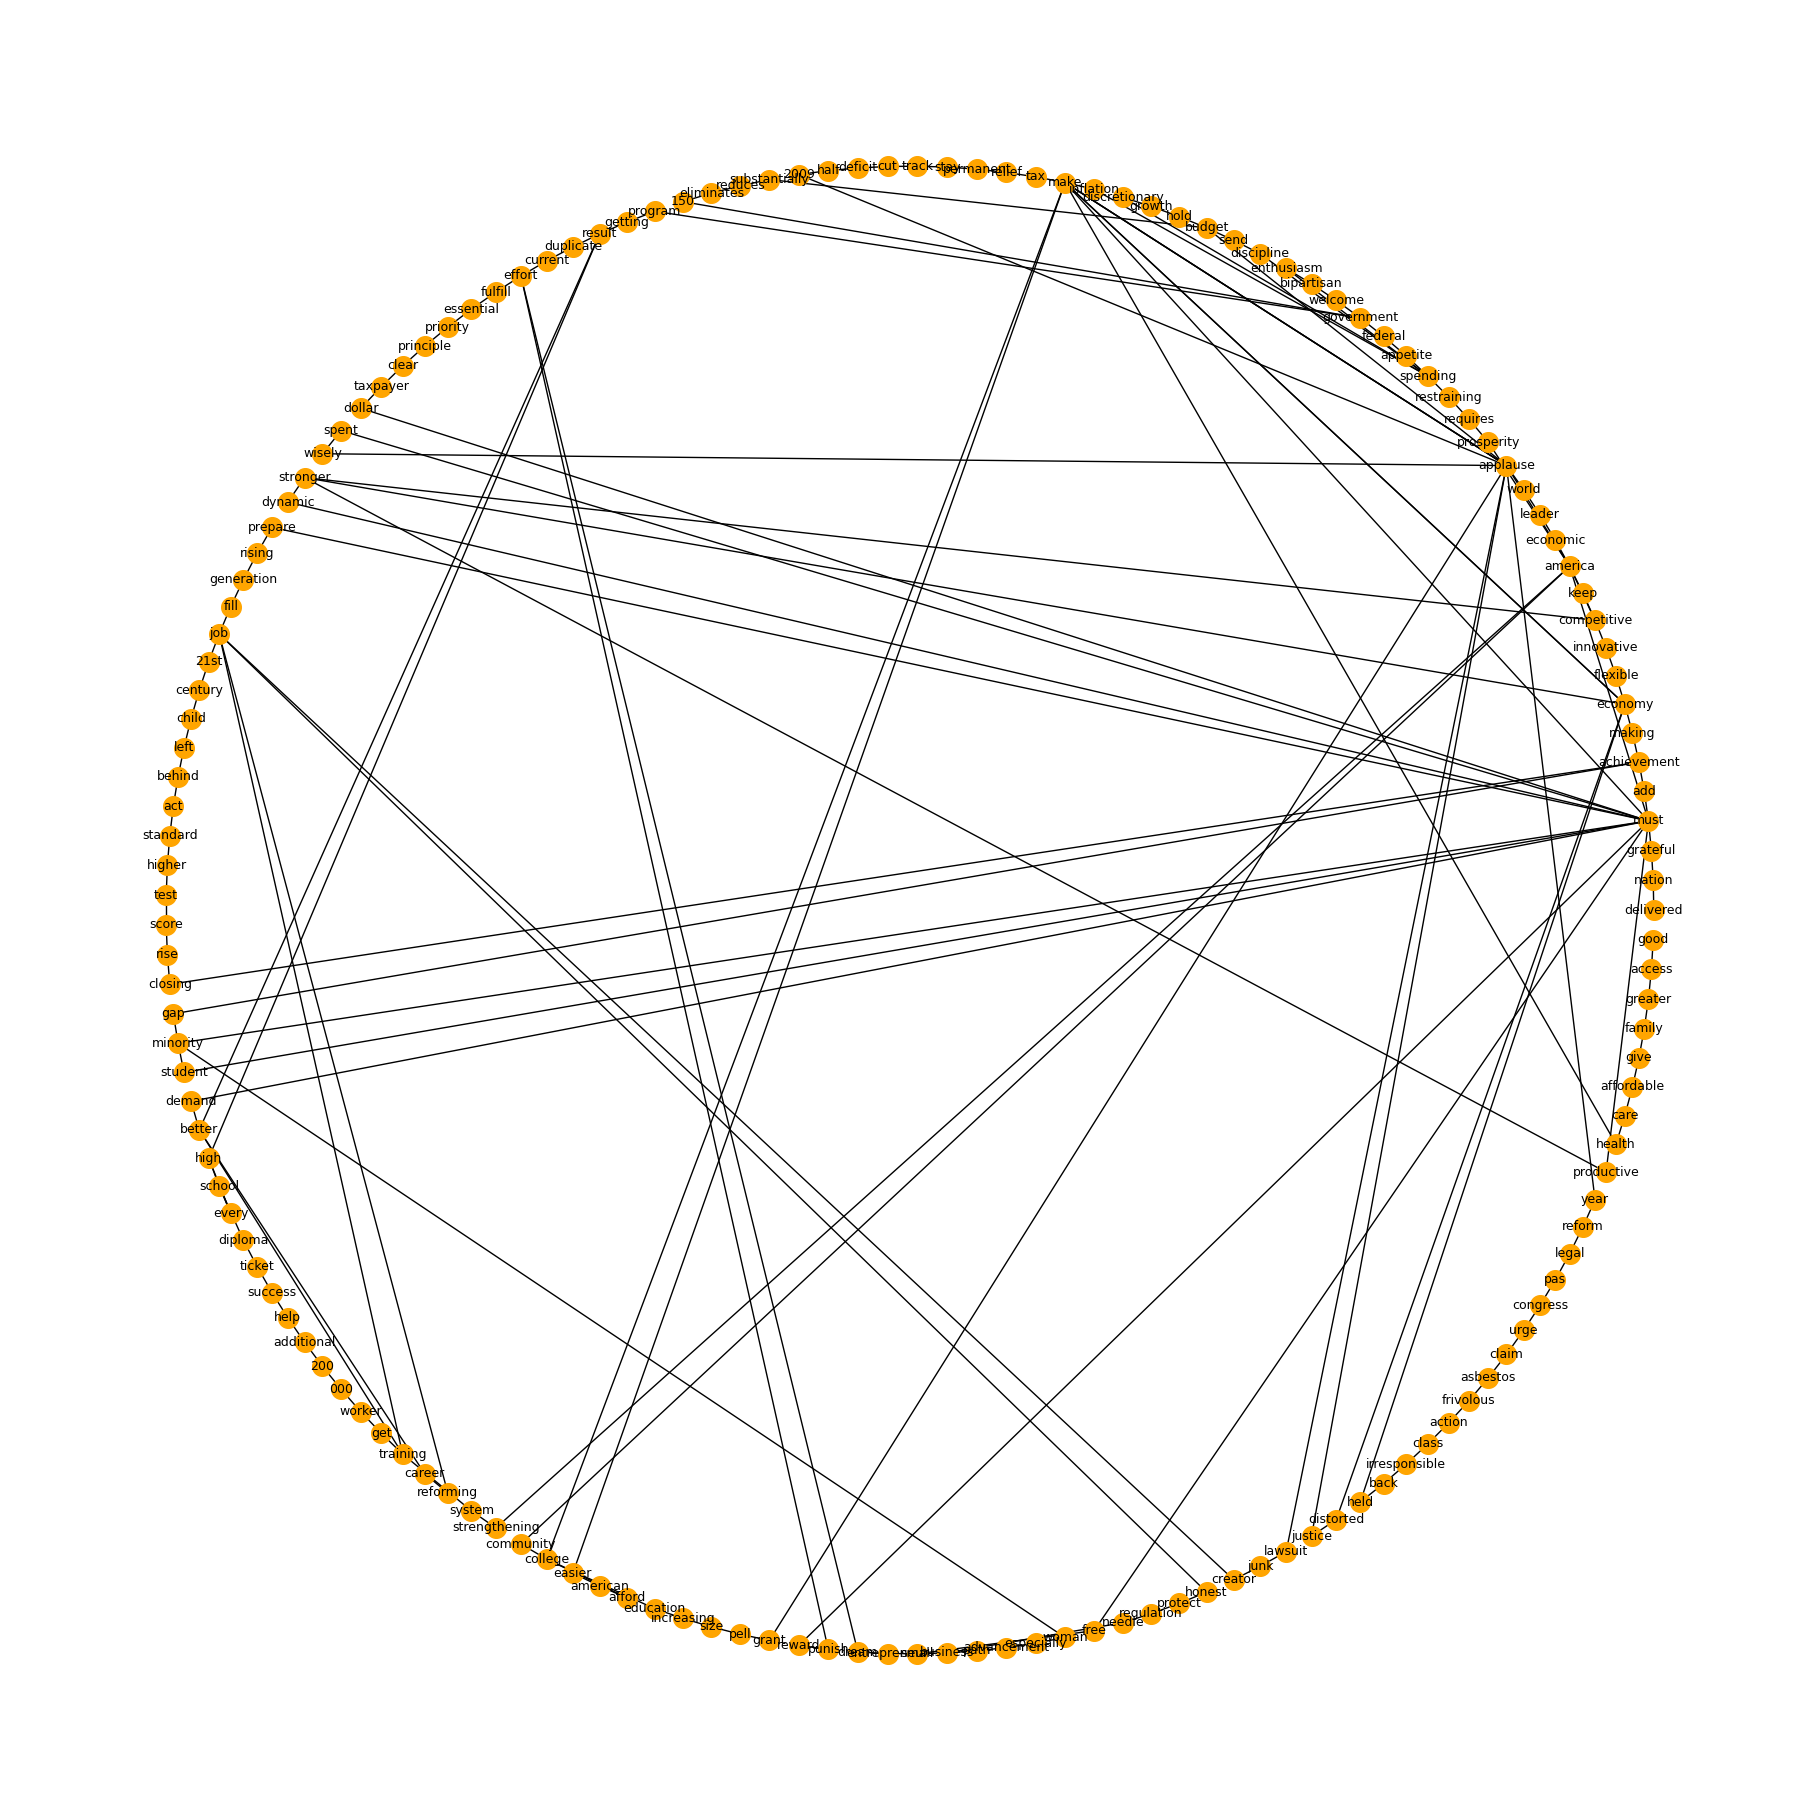

In [9]:
start_time = time.time()


G = nx.MultiGraph()

# pairings between consecutive words in the sentence
for pair0, pair1 in zip(tagged[:-1], tagged[1:]):
    w0, t0 = pair0
    w1, t1 = pair1
    edge_key = "{0} {1}".format(t0, t1)
    G.add_edge(w0,w1,edge_key) # add edges
    

### set param
figure(figsize=(18, 18))
nx.draw_circular(G, with_labels=True,node_size=200,node_color='orange',font_size=9)


print("Time Taken to Draw the graph :  " + str(time.time() - start_time))    
    


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
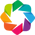

:Chord   [start,end]

In [11]:
import holoviews as hv
from holoviews import dim, opts

start_time = time.time()

hv.extension('bokeh')


chord = hv.Chord(tagged) 
chord.opts(fontscale=2, width=800, height=800, title='POS Network')
chord.opts(
    opts.Chord(cmap='Category20', edge_cmap='Category20', edge_color=dim('to').str(), 
               labels='index',fontsize=5, node_color=dim('index').str()))